## 6.4　正則化

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../input/deeplearningfromscratchmaster/deep-learning-from-scratch-master')

In [3]:
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

### 6.4.1　過学習

In [4]:
x_train = np.load('../input/load-mnist/load_mnist/normalize=True, one_hot_label=True/x_train.npy')
t_train = np.load('../input/load-mnist/load_mnist/normalize=True, one_hot_label=True/t_train.npy')
x_test = np.load('../input/load-mnist/load_mnist/normalize=True, one_hot_label=True/x_test.npy')
t_test = np.load('../input/load-mnist/load_mnist/normalize=True, one_hot_label=True/t_test.npy')

x_train = x_train[:300]
t_train = t_train[:300]

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(300, 784)
(300, 10)
(10000, 784)
(10000, 10)


In [5]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

In [6]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

In [7]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [8]:
iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [9]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

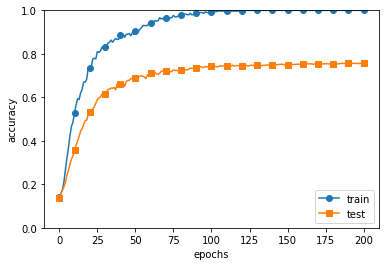

In [10]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.2　Weight decay

In [11]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask

`self.mask` には、`True` もしくは `False` が格納される。

In [12]:
mask = 2 > 1
print(mask)
print(1 * mask)

mask = 1 > 2
print(mask)
print(1 * mask)

True
1
False
0
